<a href="https://colab.research.google.com/github/KamilaKinel/DataAnalysis/blob/main/World_Hospital_Rankings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score
plt.style.use('dark_background')

# Analysis of Hospital Rankings

Data: https://www.kaggle.com/datasets/alitaqi000/world-hospital-rankings-2023

## Outline:
- Inital Visualizations
- Multiple Linear Regression
- Multiple Linear Regression With PCA
- Final Visualizations

In [ ]:
# Load in data
df = pd.read_csv("./Hospital_Ranking_Data_2023.csv")

# Let's look at the data
print("Data Overview:")
print(df.info())

# Clean the Data (remove null values)
df_cleaned = df.dropna()
df_cleaned = df_cleaned.astype({"Global Ranking": int, "Hospital Size": int, "Visibility": int, "Rich Files": int, "Scholarship Score": int})
df_cleaned = df_cleaned.nsmallest(1000, ["Global Ranking"])

# Since the data is given as objects, convert to integers, where we can
# Let's look at the data
print("Data Overview:")
print(df_cleaned.info())
print("\nHead of the Data:")
print(df_cleaned.head())
print("\nShape of the Data:")
print(df_cleaned.shape)

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12002 entries, 0 to 12001
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hospital Name      12002 non-null  object 
 1   Country Name       12002 non-null  object 
 2   Global Ranking     12002 non-null  object 
 3   Hospital Size      12002 non-null  object 
 4   Visibility         12002 non-null  object 
 5   Rich Files         12000 non-null  float64
 6   Scholarship Score  12000 non-null  float64
dtypes: float64(2), object(5)
memory usage: 656.5+ KB
None
Data Overview:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Hospital Name      1000 non-null   object
 1   Country Name       1000 non-null   object
 2   Global Ranking     1000 non-null   int64 
 3   Hospital Size      1000 no

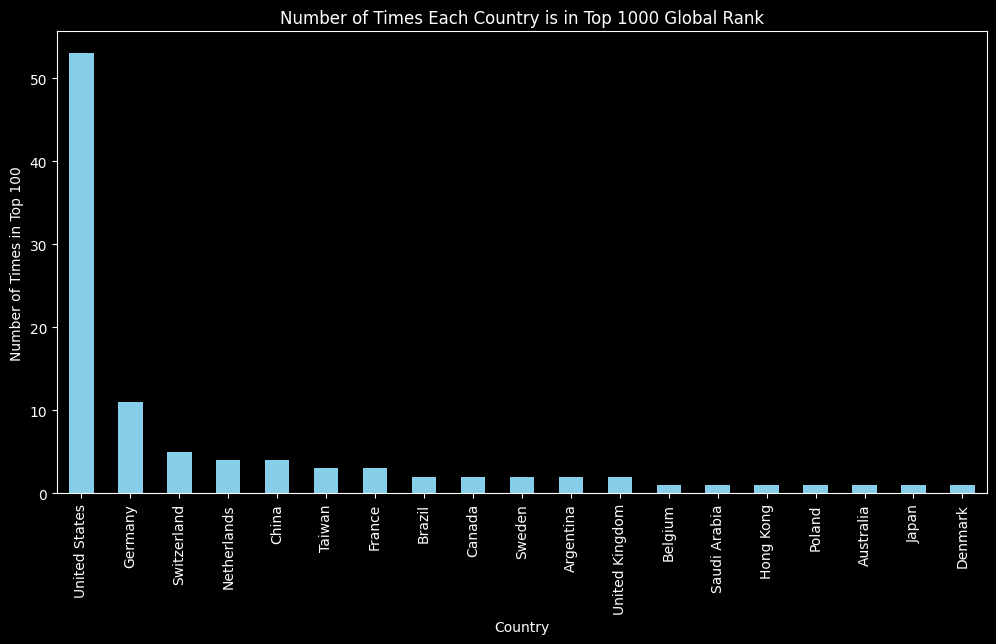

In [ ]:
# Get top 100 coutries based on Global Ranking
top_100_countries = df_cleaned[df_cleaned['Global Ranking'] <= 100]

# Count the number of times each country appears in the top 100
country_counts = top_100_countries['Country Name'].value_counts()

# Plot bar chart
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Times Each Country is in Top 1000 Global Rank')
plt.xlabel('Country')
plt.ylabel('Number of Times in Top 100')
plt.show()

# Initial Visualizations

In [ ]:
# Convert DataFrame to NumPy array
data = df_cleaned.values.T
max_ranking = max(df_cleaned["Global Ranking"])

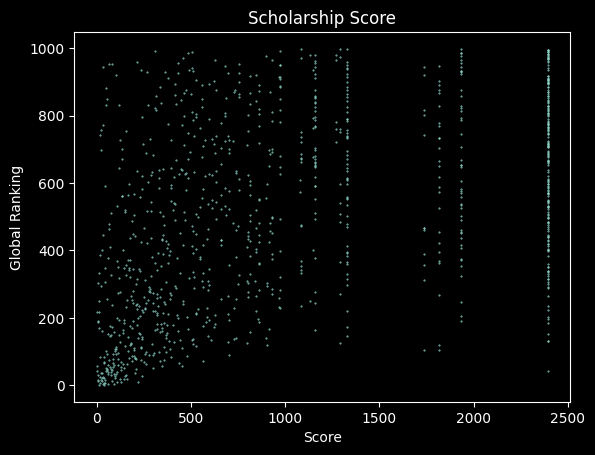

In [ ]:
plt.scatter(data[6].reshape(-1, 1), df_cleaned["Global Ranking"], s=0.2)

# Customize the plot
plt.title('Scholarship Score')
plt.ylabel('Global Ranking')
plt.xlabel('Score')

y_ticks_positions = np.arange(0, max_ranking + 200, 200)
y_ticks_labels = np.arange(0, max_ranking + 200, 200)
plt.yticks(y_ticks_positions, y_ticks_labels)

# Show the plot
plt.show()

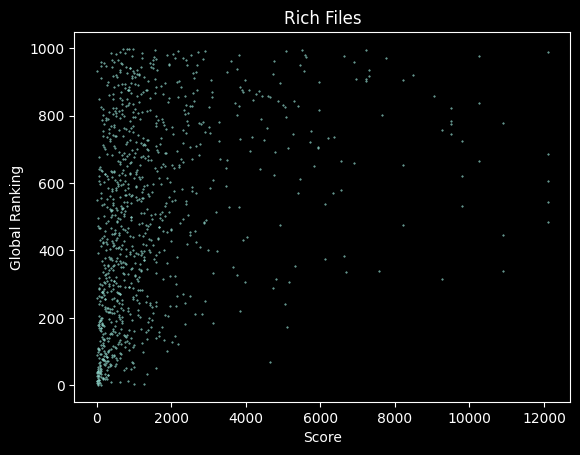

In [ ]:
plt.scatter(data[5].reshape(-1, 1), df_cleaned["Global Ranking"], s=0.2)

# Customize the plot
plt.title('Rich Files')
plt.ylabel('Global Ranking')
plt.xlabel('Score')

y_ticks_positions = np.arange(0, max_ranking + 200, 200)
y_ticks_labels = np.arange(0, max_ranking + 200, 200)
plt.yticks(y_ticks_positions, y_ticks_labels)

# Show the plot
plt.show()

Text(0, 0.5, 'Global Ranking')

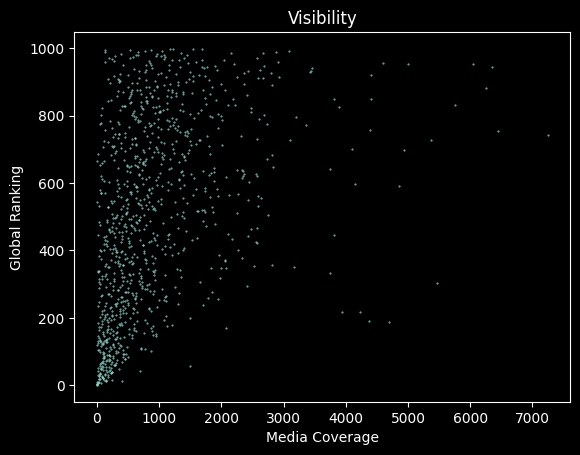

In [ ]:
# Initial plot for visibility v global ranking
plt.scatter(data[4].reshape(-1, 1), df_cleaned["Global Ranking"], s=0.2)
plt.title('Visibility')
plt.xlabel('Media Coverage')
plt.ylabel('Global Ranking')

Text(0, 0.5, 'Ranking')

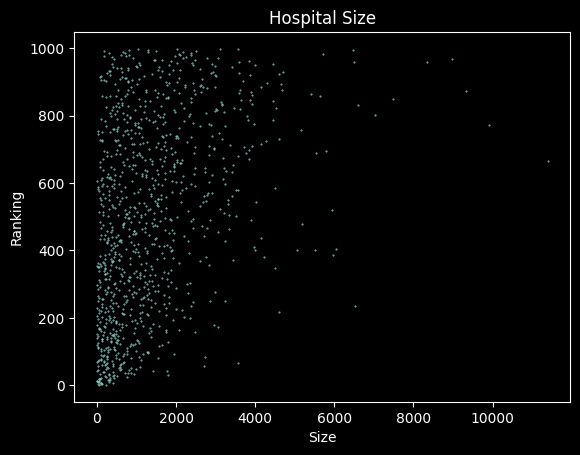

In [ ]:
# Initial plot for the hospital size with respect to gloabl ranking
plt.scatter(data[3].reshape(-1, 1), df_cleaned["Global Ranking"], s=0.2)
plt.title('Hospital Size')
plt.xlabel('Size')
plt.ylabel('Ranking')

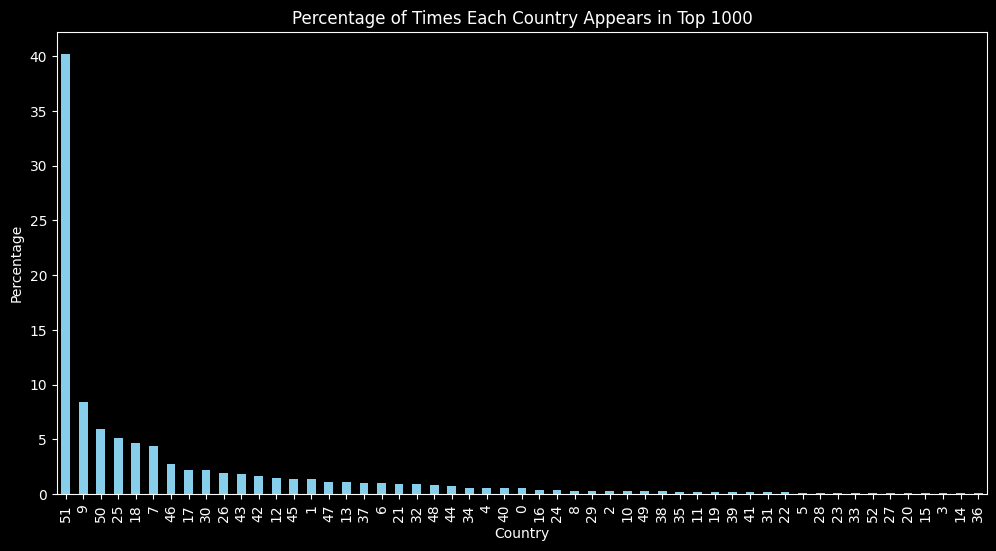

In [ ]:
# Calculate the percentage of times each country appears in the top 1000
country_percentages = (df_cleaned['Country Name'].value_counts() / len(df_cleaned)) * 100

# Plot bar chart for the percentage of times each country appears
plt.figure(figsize=(12, 6))
country_percentages.plot(kind='bar', color='skyblue')
plt.title('Percentage of Times Each Country Appears in Top 1000')
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.show()


# Multiple Linear Regression

In [ ]:
#change country name into numberic categories
df_cleaned['Country Name'] = df_cleaned['Country Name'].astype('category')
df_cleaned['Country Name'] = df_cleaned['Country Name'].cat.codes
#df_cleaned = df_cleaned.drop(columns = 'Hospital Name')


X_unscaled = df_cleaned.drop(columns = "Global Ranking")
y = df_cleaned['Global Ranking']

scaler = StandardScaler()
X = scaler.fit_transform(X_unscaled)


array([[ 0.87542706, -0.83743918, -0.94952362, -0.76428254, -1.20232098],
       [ 0.87542706, -0.96340931, -0.9516076 , -0.72147131, -1.17063451],
       [ 0.87542706, -0.98904276, -0.94848163, -0.75731327, -1.14138547],
       ...,
       [ 0.87542706, -0.23981344,  0.79789518, -0.29136777,  0.40272035],
       [ 0.64883794,  0.47792335,  0.26439582, -0.37151438,  1.14125872],
       [-1.95693692,  1.6035983 ,  0.32274731, -0.34712193,  0.35519065]])

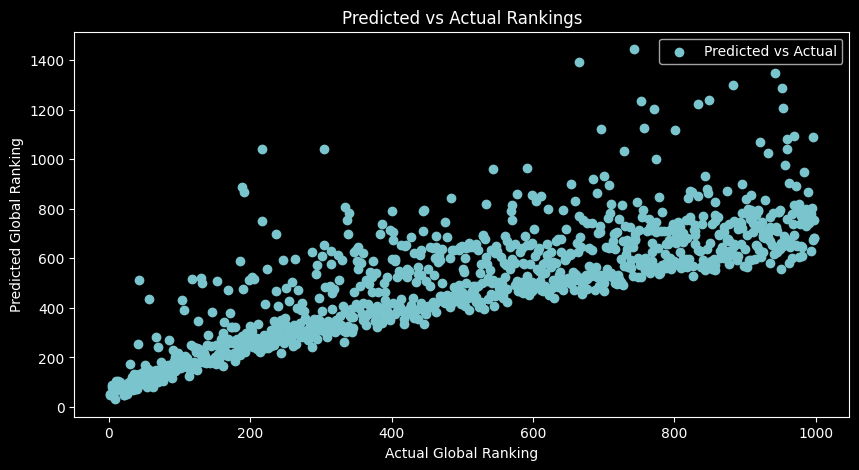

Multiple Linear Regression:
Mean Squared Error: 28694.255948234415
R-squared: 0.655348149393957



In [ ]:
# Code to try to do mult linear without LinearRegression()----------------------------------

color_plot = "#7AC5CD" # blue color for points
# STILL NEEDS to run "scale the data above"
# Adding a column of ones for intercept coefficients
X_with_int = np.append(arr=np.ones((X.shape[0], 1)).astype(int), values= X, axis=1)
# Multiple linear regression using the Normal Equation (Theta = (X'X)^-1 X'y)
X_transpose = X_with_int.T
theta_best = np.linalg.inv(X_transpose.dot(X_with_int)).dot(X_transpose).dot(y)
# Making predictions
y_pred = X_with_int.dot(theta_best)

# MLR line
# idk how rn

# Plotting results
plt.figure(figsize=(10, 5))
plt.scatter(y, y_pred, color=color_plot, label='Predicted vs Actual')
plt.title('Predicted vs Actual Rankings')
plt.xlabel('Actual Global Ranking')
plt.ylabel('Predicted Global Ranking')
plt.legend()
plt.show()

# Mean Squared Error and R-squared
mse_MLR = np.mean((y - y_pred)**2)
r_MLR = 1 - np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2)
print("Multiple Linear Regression:")
print(f"Mean Squared Error: {mse_MLR}")
print(f"R-squared: {r_MLR}\n")

In [ ]:
#splitting the dataset
from sklearn.model_selection import train_test_split
#test_size 0.3 = means that 30% will be used for testing and 70% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
#y-intercept
c = lr.intercept_
c

495.59574226530066

In [ ]:
#coefficient
m = lr.coef_
m

array([ 19.74562084,  73.01729893, 168.96804491,  56.43978601,
       156.06475344])

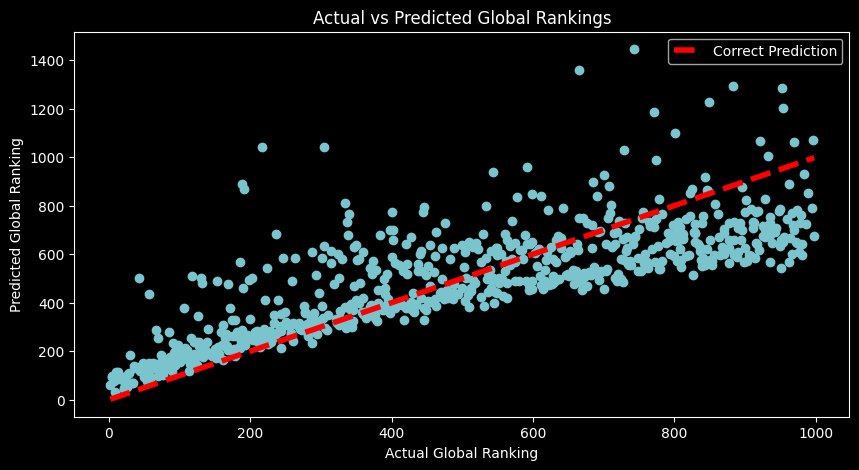

Multiple Linear Regression:
Mean Squared Error: 29959.692546484937
R-squared: 0.6386099898956612


In [ ]:
color_plot = "#7AC5CD"
y_pred_train = lr.predict(X_train)

plt.figure(figsize=(10, 5))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=4, label='Correct Prediction')

plt.scatter(y_train, y_pred_train, c= color_plot)
plt.title('Actual vs Predicted Global Rankings')
plt.xlabel("Actual Global Ranking")
plt.ylabel("Predicted Global Ranking")

# Add legend to the plot
plt.legend()

plt.show()
#r2 score = shows you how close the data has fitted to the regression line
score =r2_score(y_train, y_pred_train)
mser = mean_squared_error(y_train, y_pred_train)
print("Multiple Linear Regression:")
print(f"Mean Squared Error: {mser}")
print(f"R-squared: {score}")


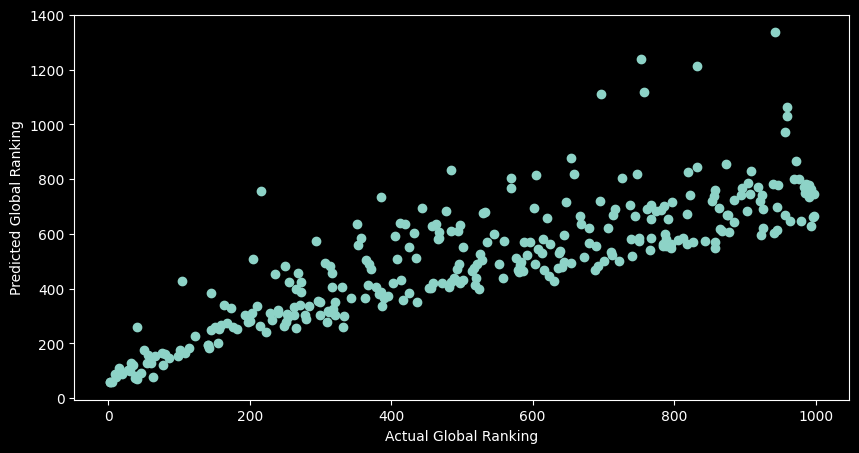

In [ ]:
#testing
y_pred_test = lr.predict(X_test)

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Global Ranking")
plt.ylabel("Predicted Global Ranking")
plt.show()

#MUlTIPLE LINEAR REGRESSION WITH PCA

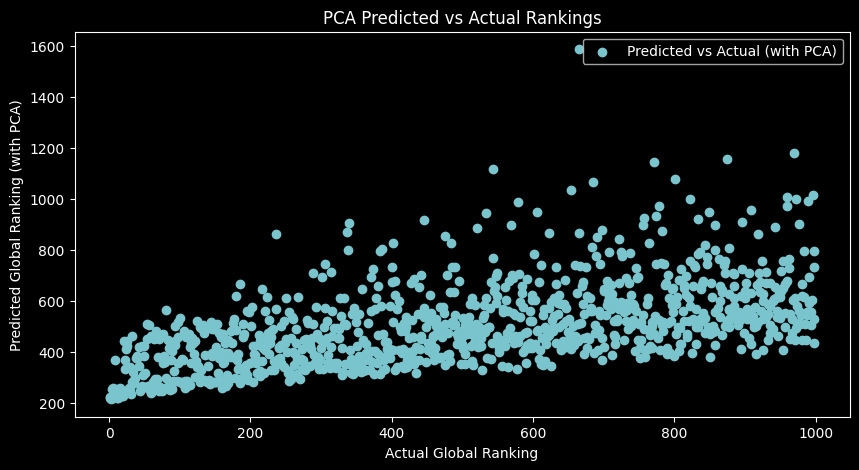

PCA-based Multiple Linear Regression:
Mean Squared Error: 56207.58372755918
R-squared: 0.3248806386635247


In [ ]:
# PCA done with pca library for result comparison-------------------------------------------------------
from sklearn.metrics import mean_squared_error, r2_score
color_points = "#7AC5CD"  # Light green color for points
scaler = StandardScaler()
X_std = scaler.fit_transform(X)  # Assume X is your features dataframe without the intercept

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
# Intercept for linear regression
X_pca_biased = np.hstack((np.ones((X_pca.shape[0], 1)), X_pca))
# multiplinear regression model
model = LinearRegression()
model.fit(X_pca_biased, y)
# predict
y_pred_pca = model.predict( X_pca_biased)
# Plot actual vs pred values using PCA

plt.figure(figsize=(10, 5))
plt.scatter(y, y_pred_pca, color=color_points, label='Predicted vs Actual (with PCA)')
plt.title('PCA Predicted vs Actual Rankings')
plt.xlabel('Actual Global Ranking')
plt.ylabel('Predicted Global Ranking (with PCA)')
plt.legend()
plt.show()
# Calculate MSE
mse = mean_squared_error(y, y_pred_pca)
# Calculate R-squared
r_squared = r2_score(y, y_pred_pca)
# Print the results
print("PCA-based Multiple Linear Regression:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

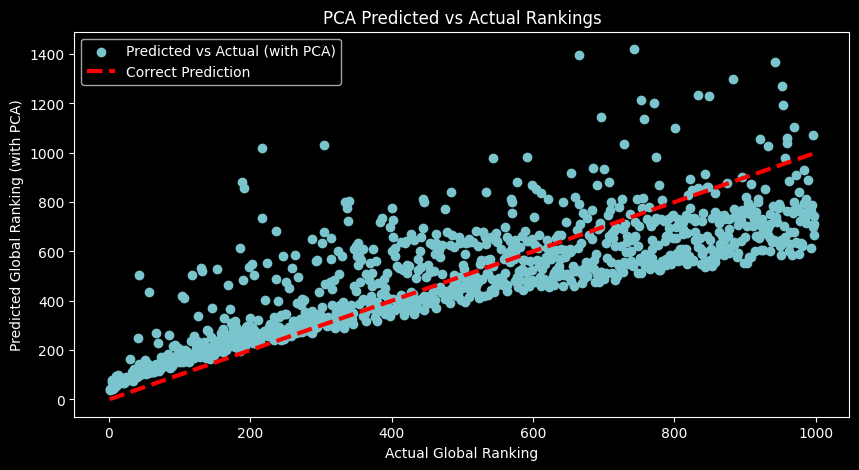

PCA-based Multiple Linear Regression:
Mean Squared Error: 28923.157045782875
R-squared: 0.6525987772890258


In [ ]:
# PCA done without pca library for result comparison-------------------------------------------------------
color_points = "#7AC5CD"  # Light green color for points
# Standardize data
scaler = StandardScaler()
X_std = scaler.fit_transform(df_cleaned[["Hospital Size", "Visibility", "Rich Files", "Scholarship Score"]])
# Covariance matrix
cov_matrix = np.cov(X_std.T)

#Calc eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort the eigenvectors by eigonvalues
eigenvectors = eigenvectors[:, eigenvalues.argsort()[::-1]]
# k eigenvectors = projection matrix
k = 4
projection_matrix = eigenvectors[:, :k]
#Mult standardized data by projection matrix
X_pca_man = X_std.dot(projection_matrix)
#Multipl Linear Regression on the PCA-transformed data
# Adding the intercept term
X_pca_manual_biased = np.append(arr=np.ones((X_pca_man.shape[0], 1)), values=X_pca_man, axis=1)

# Multiple linear regression using normal equation
theta_pca_manual = np.linalg.inv(X_pca_manual_biased.T.dot(X_pca_manual_biased)).dot(X_pca_manual_biased.T).dot(y)
# Predictions
y_pred_pca_manual = X_pca_manual_biased.dot(theta_pca_manual)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y, y_pred_pca_manual, color=color_points, label='Predicted vs Actual (with PCA)')
plt.plot(y, y, color='red', linestyle='--', linewidth=3, label='Correct Prediction')
plt.title('PCA Predicted vs Actual Rankings')
plt.xlabel('Actual Global Ranking')
plt.ylabel('Predicted Global Ranking (with PCA)')
plt.legend()
plt.show()

# Calc mse and r
# Mean Squared Error and R-squared for the PCA-based regression
mse_pca = np.mean((y - y_pred_pca_manual)**2)
r_squared_pca = 1 - np.sum((y - y_pred_pca_manual)**2) / np.sum((y - np.mean(y))**2)
print("PCA-based Multiple Linear Regression:")
print(f"Mean Squared Error: {mse_pca}")
print(f"R-squared: {r_squared_pca}")


# Idfor post regression testing
  - VIF, check for collinearly
  - Remove visibility to see how it changes
    outcome (esp since we dont know how it correlates)
    - mult linear without visibility?


## Clustering


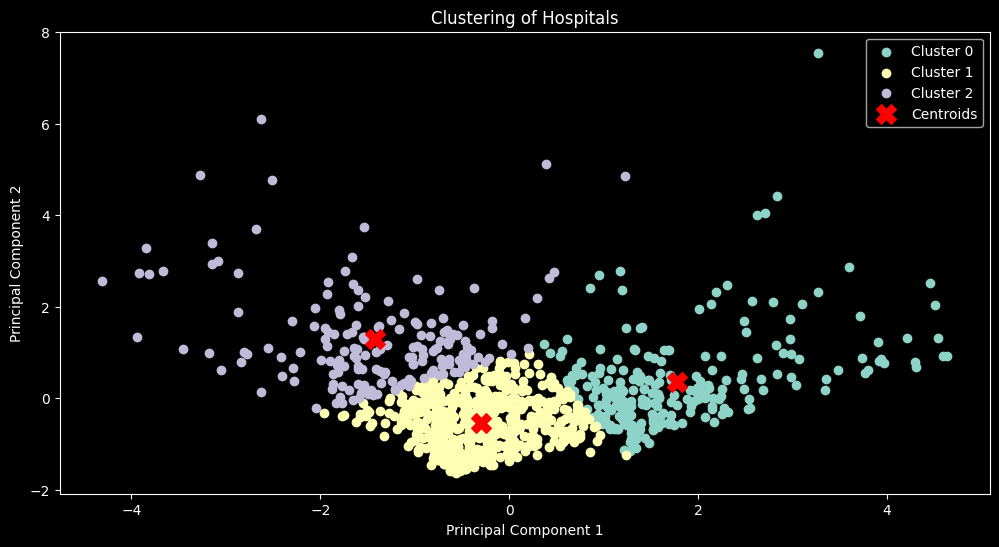


Hospital Size:

         count         mean          std   min     25%     50%      75%  \
Cluster                                                                   
0        238.0  1387.222689  1449.228573   2.0   424.0   941.5  1866.75   
1        585.0   886.941880   694.525124   1.0   309.0   715.0  1376.00   
2        177.0  2962.836158  1684.192281  48.0  1758.0  2929.0  3645.00   

             max  
Cluster           
0        11397.0  
1         2958.0  
2         9897.0  

Visibility:

         count         mean          std   min      25%     50%      75%  \
Cluster                                                                    
0        238.0   381.058824   286.627143   7.0   142.25   330.5   581.75   
1        585.0   749.560684   588.679376   1.0   289.00   624.0  1079.00   
2        177.0  2186.858757  1367.214856  99.0  1270.00  1915.0  2615.00   

            max  
Cluster          
0        1938.0  
1        3447.0  
2        7248.0  

Rich Files:

         coun

In [ ]:
# Select relevant features for clustering
features_for_clustering = ["Hospital Size", "Visibility", "Rich Files", "Scholarship Score"]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned[features_for_clustering])

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit_transform(X_pca)

# Add cluster labels to the original dataset
df_cleaned['Cluster'] = kmeans.labels_

# Visualize the clusters in 2D using PCA
plt.figure(figsize=(12, 6))
for cluster in range(3):
    cluster_data = X_pca[df_cleaned['Cluster'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('Clustering of Hospitals')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Set display options to show more rows
pd.set_option('display.max_rows', None)

# Display statistics for relevant features
cluster_stats = df_cleaned.groupby('Cluster').describe()
features_for_analysis = ["Hospital Size", "Visibility", "Rich Files", "Scholarship Score"]
cluster_stats_features = cluster_stats[features_for_analysis]

for feature in features_for_analysis:
    print(f"\n{feature}:\n")
    print(cluster_stats_features[feature])

# Display the average global ranking for each cluster
print("\nGlobal Ranking:\n")
print(df_cleaned.groupby('Cluster')['Global Ranking'].mean())

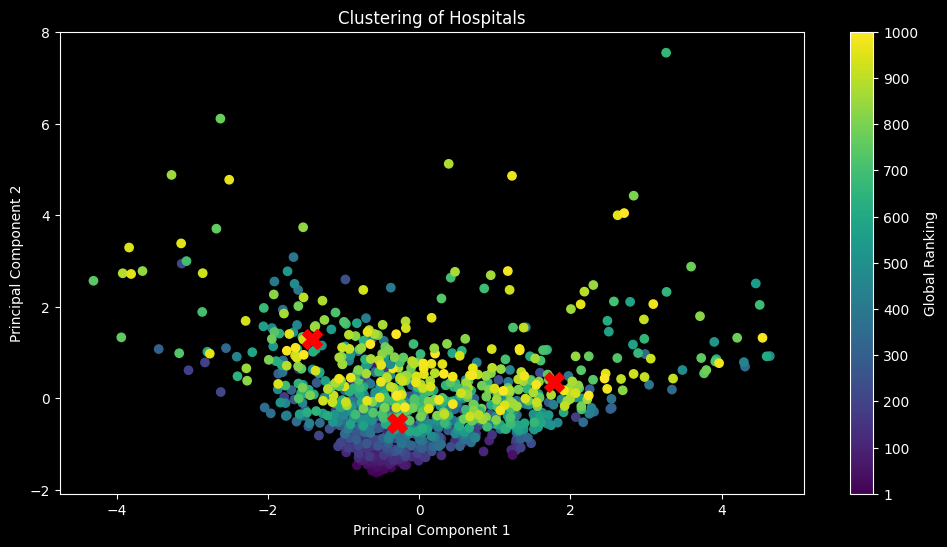

In [ ]:
# Get global rankings and assign colors based on a colormap
global_rankings = df_cleaned['Global Ranking']
colors = plt.cm.viridis(global_rankings / global_rankings.max())  # Use viridis colormap, adjust as needed

# Visualize the clusters in 2D using PCA and color points based on global ranking
plt.figure(figsize=(12, 6))
for cluster in range(3):
    cluster_data = X_pca[df_cleaned['Cluster'] == cluster]
    cluster_colors = colors[df_cleaned['Cluster'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster + 1}', c=cluster_colors)

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('Clustering of Hospitals')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add colorbar to show the mapping of global ranking values to colors
cbar = plt.colorbar(orientation='vertical')
cbar.set_label('Global Ranking')
cbar.set_ticks(np.linspace(0, 1, 11))
cbar.set_ticklabels(np.linspace(1, 1000, 11).astype(int))

plt.show()
